In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [3]:
crime = pd.read_csv("/content/crime_data.csv")
crime.head(6)

,location,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.isnull().sum()

location    0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [15]:
def_norm = norm_func(crime.iloc[:,1:])
def_norm.head(6)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370


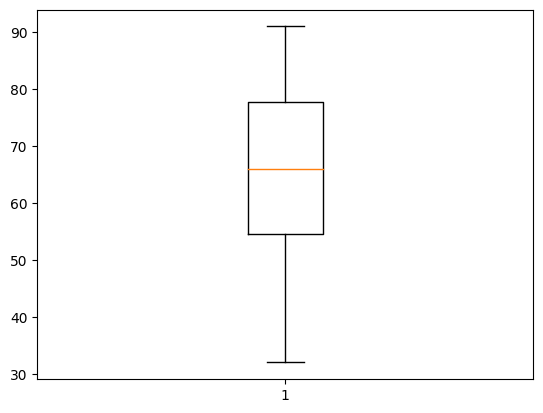

In [16]:
plt.boxplot(crime['UrbanPop'])
plt.show()

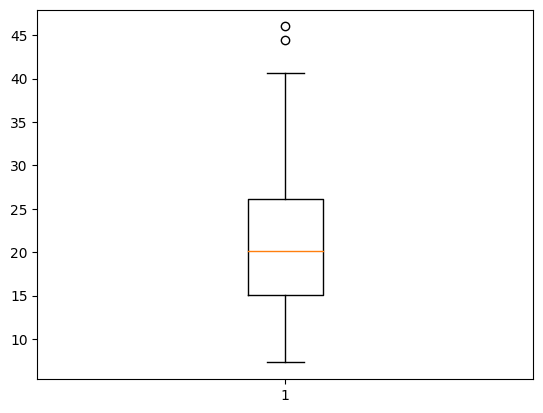

In [17]:
plt.boxplot(crime["Rape"])
plt.show()

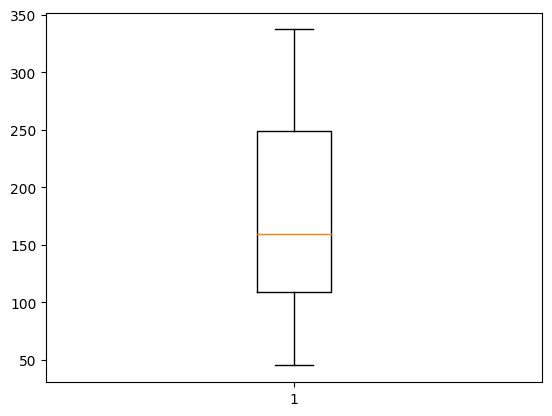

In [19]:
plt.boxplot(crime["Assault"])
plt.show()

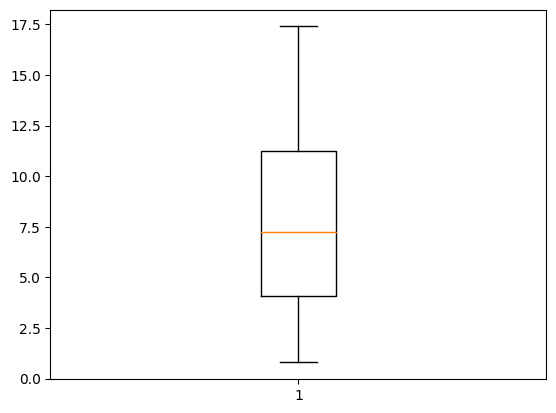

In [20]:
plt.boxplot(crime["Murder"])
plt.show()

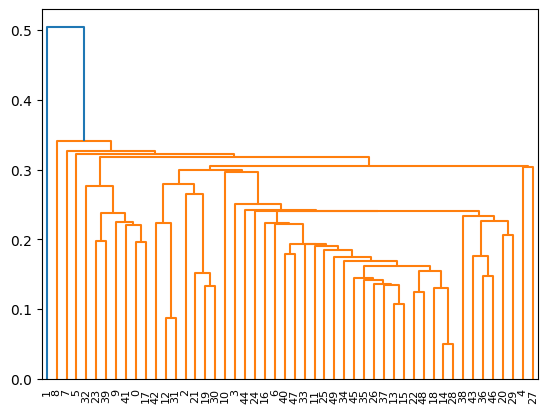

In [21]:
dendrogram = sch.dendrogram(sch.linkage(def_norm,method='single'))

In [22]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')


In [23]:
hc.fit_predict(def_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [24]:
y_hc =hc.fit_predict(def_norm)
def_norm['clusterid'] = y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [25]:
def_norm

,Murder,Assault,UrbanPop,Rape,clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,4
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,2
9,1.000000,0.568493,0.474576,0.478036,0


In [26]:
crime['clusterid'] = y_hc
crime

,location,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [29]:
crime.groupby(['clusterid'])['location'].apply(lambda x:tuple(x))

clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: location, dtype: object

In [30]:
#K-Means

In [31]:
from sklearn.cluster import KMeans
crime = pd.read_csv('/content/crime_data.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

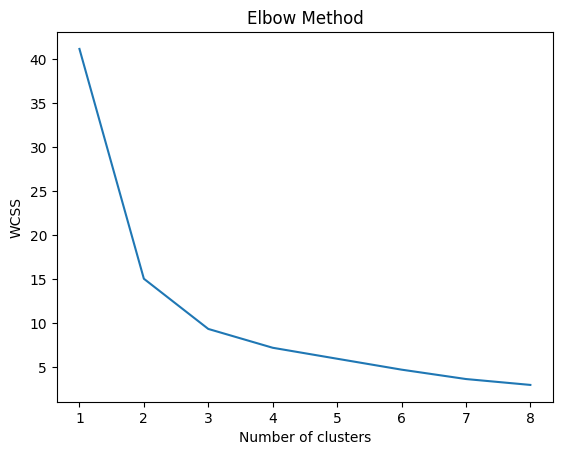

In [32]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(def_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
clusters_new = KMeans(2, random_state=42)
clusters_new

KMeans(n_clusters=2, random_state=42)

In [34]:
clusters_new.fit(def_norm)
clusters_new.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
crime['ClusterID']=clusters_new.labels_
crime.head(11)


,location,Murder,Assault,UrbanPop,Rape,ClusterID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [36]:
#DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons

In [38]:
x , y = make_moons(100)
data = pd.DataFrame(x)
data.columns = ["F1","F2"]
data["Labels"] = y
data.head()


,F1,F2,Labels
0,1.572117,-0.320172,1
1,0.404783,0.914413,0
2,-0.672301,0.740278,0
3,-0.518393,0.855143,0
4,0.481607,-0.355143,1


<ipython-input-39-ad8b3f9406a8>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['F1'],data['F2'],cmap=plt.cm.Accent)


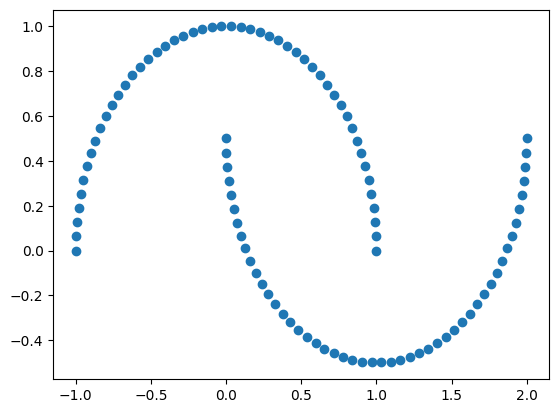

In [39]:
plt.scatter(data['F1'],data['F2'],cmap=plt.cm.Accent)

In [40]:
#Using KMeans

In [41]:
model = KMeans(n_clusters=2,max_iter=600,algorithm='auto')
model.fit(data.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=600, n_clusters=2)

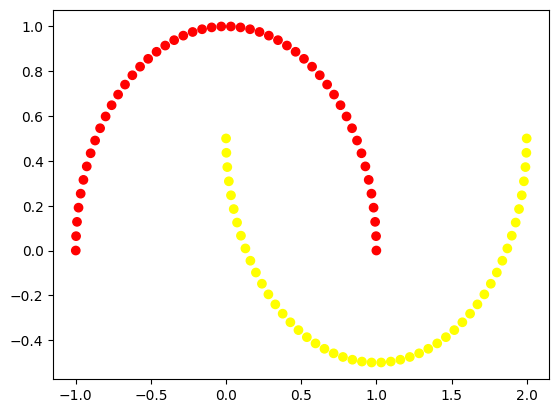

In [42]:
plt.scatter(data['F1'],data['F2'],c=model.labels_ ,cmap=plt.cm.autumn)

In [43]:
#Agglomerative Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


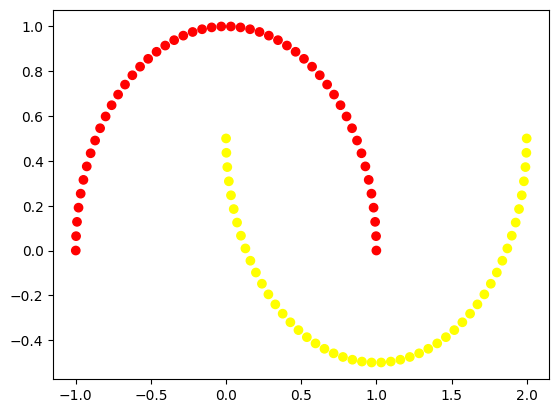

In [44]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
plt.scatter(data['F1'],data['F2'],c=cluster.fit_predict(data.iloc[:,1:]),cmap=plt.cm.autumn)


In [45]:
#Using DBSCAN

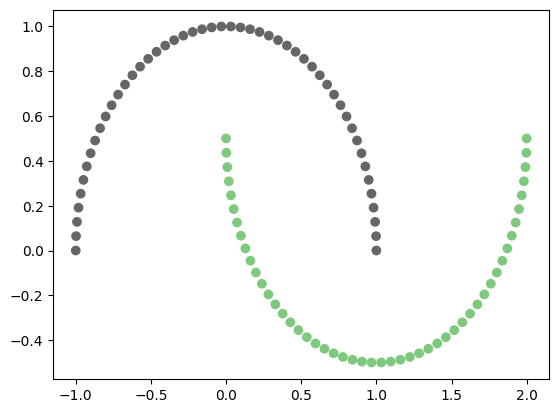

In [46]:
dbs = DBSCAN(min_samples=2,eps=0.2)
class_pr = dbs.fit_predict(data.iloc[:,1:])
plt.scatter(data['F1'],data['F2'],c=class_pr,cmap=plt.cm.Accent)